In [1]:
from model import EncoderRNN, AttnDecoderRNN
from utils import SOS_token, get_dataloader, prepareData
import torch

In [2]:
from training_utils import  evaluateAndShowAttention, evaluateRandomly

In [3]:
hidden_size = 128
batch_size = 64
MAX_LENGTH = 10
eng_prefixes = (
    "i am ",
    "i m ",
    "he is",
    "he s ",
    "she is",
    "she s ",
    "you are",
    "you re ",
    "we are",
    "we re ",
    "they are",
    "they re ",
)

dataset_path = "data/"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_lang, output_lang, pairs = prepareData(
        "eng",
        "fra",
        True,
        dataset_path=dataset_path,
        MAX_LENGTH=MAX_LENGTH,
        eng_prefixes=eng_prefixes,
    )

Reading lines...


In [4]:
encoder = EncoderRNN(input_lang.n_words, hidden_size).to(device)
decoder = AttnDecoderRNN(
    hidden_size=hidden_size,
    output_size=output_lang.n_words,
    dropout_p=0.1,
    **{"MAX_LENGTH": MAX_LENGTH, "device": device, "SOS_token": SOS_token},
).to(device)

In [5]:
# Load trained model
encoder.load_state_dict(torch.load("encoder.pt"))
decoder.load_state_dict(torch.load("decoder.pt"))

encoder = encoder.eval()
decoder = decoder.eval()

In [12]:
evaluateRandomly(encoder, decoder, pairs, input_lang, output_lang, n=3)

FR       : ils sont tous deux bons
ENG (GT) : they are both good
ENG (Pred): they are both good <EOS>

FR       : je ne suis plus votre mari
ENG (GT) : i m not your husband anymore
ENG (Pred): i m not your husband anymore <EOS>

FR       : nous sommes en securite ici
ENG (GT) : we re safe here
ENG (Pred): we re safe here <EOS>



input = vous etes plus grand que moi
output = you are taller than me <EOS>


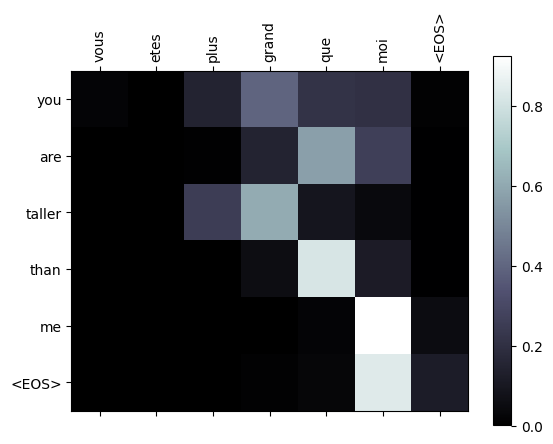

In [14]:
evaluateAndShowAttention('vous etes plus grand que moi', encoder, decoder, input_lang, output_lang)